In [112]:
import pandas as pd
from pandas import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [113]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [114]:
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [115]:
cust_filter = data['cust_id'] == 'klant_69'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

In [116]:
data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2020-01-01']

In [117]:
data.drop(['procesdag'], axis='columns', inplace=True)
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [118]:
data_diff = data['aantal_pakketten'].diff()
data_diff.fillna(0, inplace=True)

In [119]:
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([1, 2, 3, 4, 1, 2, 3, 4])
#tscv = TimeSeriesSplit(n_splits=4)

In [120]:
#for train_index, test_index in tscv.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     print('Training indices:', train_index, 'Validation indices:', test_index)

In [121]:
#tscv_list = list(tscv.split(X))

In [122]:
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []

In [123]:
y = data_diff[:'2019-01-01']
X = data.index

In [124]:
train_end = datetime(2018,1,1)
val_end = datetime(2019,1,1)

train_data = y[:train_end]
val_data = y[train_end + timedelta(days=1):val_end]

cross_validation = y[:752]
test = y[752:]

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
my_order = (1,0,1)
my_seasonal_order = (0, 1, 1, 12)

In [126]:
rolling_predictions = val_data.copy()
for train_end in val_data.index:
    train_data = y[:train_end-timedelta(days=1)]
    for train_index, test_index in tscv.split(cross_validation):
        train_data, val_data = cross_validation.iloc[train_index], cross_validation.iloc[test_index]
    
        model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
        model_fit = model.fit()
    
        pred = model_fit.forecast()
        print(pred)
        rolling_predictions[train_end] = pred
        true_values = val_data.values
#        rmse.append(np.sqrt(mean_squared_error(true_values, pred)))
#print("RMSE: {}".format(np.mean(rmse)))

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float6

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float6

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float6

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float6

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float6

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float6

2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64
2016-08-02   -4.992992
Freq: B, dtype: float64
2017-02-28    9.929736
Freq: B, dtype: float64
2017-09-26   -38.606033
Freq: B, dtype: float64
2018-04-24   -139.781479
Freq: B, dtype: float64


Text(0.5, 1.0, 'Rolling Window Validation Klant 69')

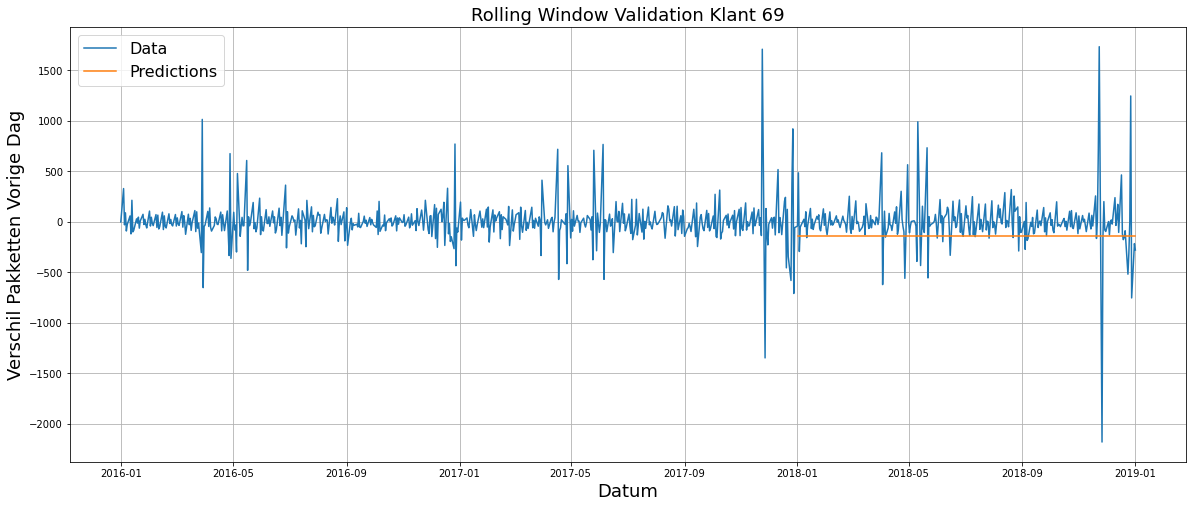

In [127]:
plt.figure(figsize=(20,8))

plt.plot(y)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.grid()
plt.xlabel('Datum',fontsize= 18)
plt.ylabel('Verschil Pakketten Vorige Dag',fontsize= 18)
plt.title('Rolling Window Validation Klant 69',fontsize= 18)
#residuals = data_diff - model_fit.fittedvalues
#print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

In [128]:
print(rolling_predictions)

procesdag
2018-01-02   -139.781479
2018-01-03   -139.781479
2018-01-04   -139.781479
2018-01-05   -139.781479
2018-01-08   -139.781479
                 ...    
2018-12-26   -139.781479
2018-12-27   -139.781479
2018-12-28   -139.781479
2018-12-31   -139.781479
2019-01-01   -139.781479
Name: aantal_pakketten, Length: 261, dtype: float64


In [129]:
print(pred)

2018-04-24   -139.781479
Freq: B, dtype: float64
